# Auswertung zur Umfrage der InNa App "CO2-Mensa"

Das Ziel der InNa App "CO2-Mensa" ist die messtechnische Erfassung der CO2 Emissionen von Mensa-Gerichten an der Universität Würzburg, die mit Methoden der Informatik realisiert, visualisiert und in Bezug zu typischen Werten in der Gesellschaft gesetzt werden, um so das eigene nachhaltige Handeln zu fördern und Selbstwirksamkeit zu erfahren. Die ersten Schritte umfassen: CO2 Bilanzierung der Mensa-Gerichte, Durchführen der Umfragen zum Nutzerverhalten, Auswertung der Ergebnisse. Eine Umfrage zu Essgewohnheiten in der Mensa und persönliche Haltung zum Essen wurde am 1. November 2023 gestartet und endete am 26. November 2023. Die Umfrage wurde innerhalb des Transformationsexperiments InNa-App am WueLAB (Nachhaltigkeitslabor der Universität Würzburg) gemeinsam mit dem Büro für Nachhaltigkeitsbüro, der Didaktik der Naturwissenschaften und dem Department of General Psychology and Methodology der Universität Bamberg durchgeführt und von mehr als 3,000 Teilnehmenden ausgefüllt. Die Umfrage wurde über Social Media Kanäle der Universität Würzburg und Bamberg angekündigt.  

## Frei verfügbarer Datensatz
Der Datensatz beinhaltet die Rohdaten der Umfrage als CSV-Dateien sowie eine Zusammenfassung der numerischen Ergebnisse und wurde auf [WueData](https://wuedata.uni-wuerzburg.de/) (das institutionelle Forschungsdatenrepositorium der Julius-Maximilians-Universität Würzburg) veröffentlicht unter:

> Hoßfeld, Tobias, Adina Waidhas, Eva Rühl, Denis Messig. *Umfrage Der InNa App ‘CO2-Mensa.’* University of Würzburg, 2024. DOI: [10.58160/127](https://dx.doi.org/10.58160/127).<br>https://doi.org/10.58160/127

## Skript zur Auswertung der Rohdaten
Das Skript zur Auswertung der numerischen Daten der Umfrage wird hier zur Verfügung gestellt. 

In [1]:
# Download data set: https://doi.org/10.58160/127

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# read data into data frames

# contains answers of users
df = pd.read_csv('data_mensaUW_nachhaltigkeit_2024-01-30_ohneFreitexte.csv',sep='\t',encoding='UTF-16')  

# questions and answer options stored in a dataframe and dictionary 
questions = pd.read_csv('variables_mensaUW_nachhaltigkeit_2023-11-08_10-45.csv',sep=';',encoding='UTF-16')
q =  questions.set_index("VAR").to_dict(orient='index')  # e.g. q["AK02_01"] 
values = pd.read_csv('values_mensaUW_nachhaltigkeit_2023-11-08_10-46.csv',sep=';',encoding='UTF-16')

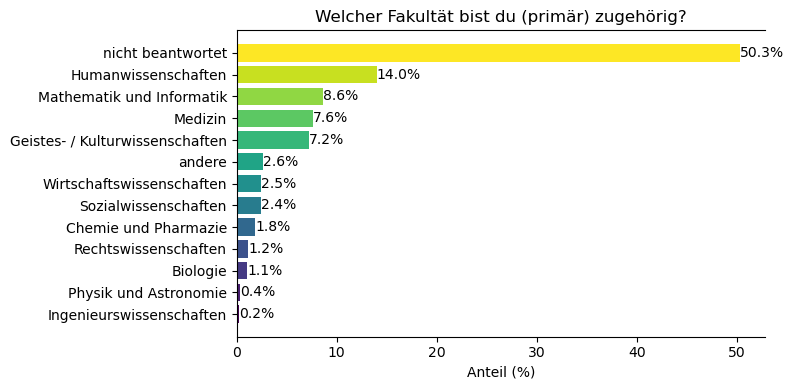

In [2]:
# "PR04";"Fakultät";"NOMINAL";"SELECTION";"Welcher Fakultät bist du (primär) zugehörig?"
myid = "PR04"
fakultaet = df[myid]

z = values[values["VAR"]==myid][["RESPONSE","MEANING"]]
mapname = dict(z.values)
mapname[13]='andere'

res = fakultaet.value_counts()
plt.figure(1, clear=True, figsize=(8,4))
ind = np.arange(len(res.values))
ax = plt.gca()
y = res.values/res.values.sum()*100
color = plt.cm.viridis_r(np.linspace(0,1,len(ind)))
bars = ax.barh(ind, y, color=color)
ax.bar_label(bars, fmt='%.1f%%')
plt.yticks(ind, labels= [mapname[k] for k in res.index] )
plt.gca().invert_yaxis()
plt.xlabel('Anteil (%)')
ax.spines['right'].set_visible(False)
plt.title(q[myid]["QUESTION"])
plt.tight_layout();

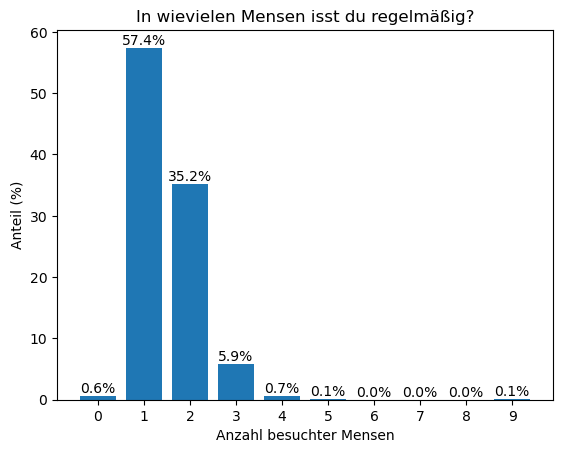

In [3]:
# "ME03";"Bezugs-Mensa: Ausweichoption (negativ) oder Anzahl ausgewählter Optionen";"METRIC";"SYSTEM";"In welcher Mensa / welchen Mensen isst du regelmäßig?"'
myid = "ME03"
mensa = df[myid]
plt.figure(2, clear=True)
y = np.bincount(mensa.to_list())
bars = plt.bar(np.arange(len(y)), y/y.sum()*100)
plt.bar_label(bars, fmt='%.1f%%')
plt.xlabel('Anzahl besuchter Mensen')
plt.ylabel('Anteil (%)')
plt.xticks(np.arange(len(y)))
plt.title('In wievielen Mensen isst du regelmäßig?');

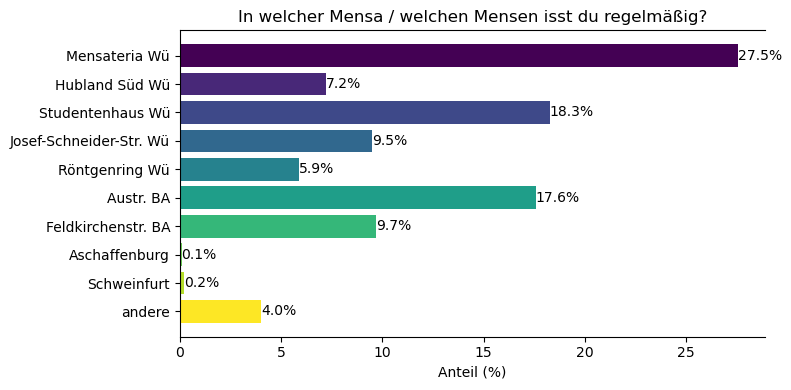

In [4]:
# "ME03";"Bezugs-Mensa: Ausweichoption (negativ) oder Anzahl ausgewählter Optionen";"METRIC";"SYSTEM";"In welcher Mensa / welchen Mensen isst du regelmäßig?"'
myids = [i for i in q.keys() if i.startswith(myid+'_')]
del myids[-1] # remove "ME03_10a";"Bezugs-Mensa: andere (offene Eingabe)";"TEXT";"OPEN";"In welcher Mensa / welchen Mensen isst du regelmäßig?"
selected= np.zeros(len(myids))
mensen = []
for i, theid in enumerate(myids):
    y = np.bincount(df[theid])
    selected[i] = y[2] 
    mensen.append(q[theid]["LABEL"][len("Bezugs-Mensa: "):])

plt.figure(3, clear=True, figsize=(8,4))    
shortname = ['Mensateria Wü', 'Hubland Süd Wü', 'Studentenhaus Wü', 'Josef-Schneider-Str. Wü', 'Röntgenring Wü', 'Austr. BA', 'Feldkirchenstr. BA', 'Aschaffenburg', 'Schweinfurt', 'andere']
ax = plt.gca()
ind = np.arange(len(mensen))
color = plt.cm.viridis(np.linspace(0,1,len(mensen)))
bars = ax.barh(ind, selected/selected.sum()*100, color=color)
ax.bar_label(bars, fmt='%.1f%%')
plt.yticks(ind, labels= shortname )
plt.gca().invert_yaxis()
plt.xlabel('Anteil (%)')
plt.title(q[myid]["QUESTION"], wrap=True)
ax.spines['right'].set_visible(False)
plt.tight_layout();

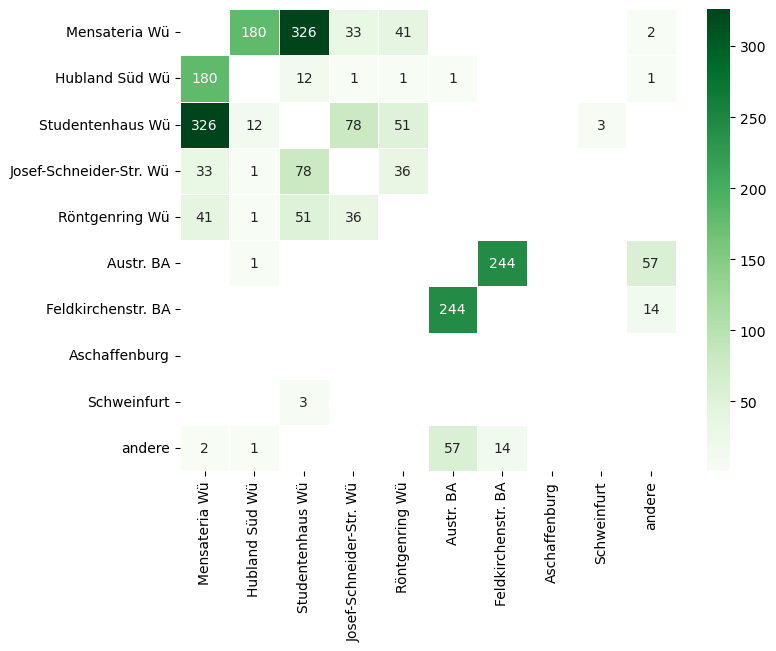

In [5]:
userMensen = np.zeros((len(mensa), len(myids)), dtype='int')
for i, theid in enumerate(myids):
    userMensen[:,i] = df[theid]==2 # selected

whichUser = np.squeeze(np.argwhere(mensa.values==2))
x = np.zeros((len(mensen),len(mensen)))
for u in whichUser:
    i,j = np.squeeze(np.argwhere(userMensen[u,:]))
    x[i,j] +=1
    x[j,i] +=1
x[x<=0] = np.NAN

plt.figure(4, clear=True, figsize=(8,6))
ax = sns.heatmap(x, linewidth=0.5, xticklabels=shortname, yticklabels=shortname,  cmap="Greens",
                 annot=True, fmt='g')
plt.show();

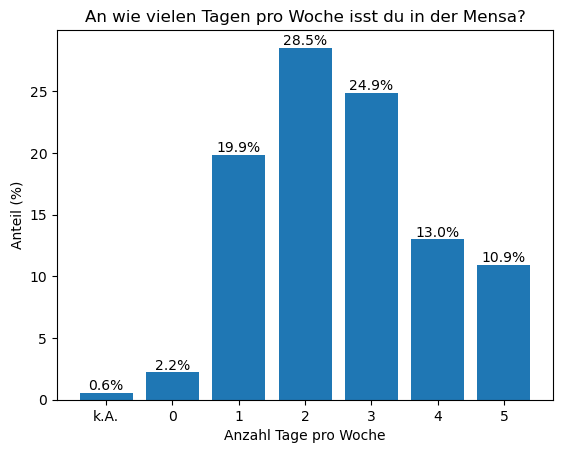

In [6]:
# "ME01";"Häufigkeit Mensa-Besuch";"NOMINAL";"SELECTION";"An wie vielen Tagen pro Woche isst du in der Mensa?"
myid = "ME01"
x = df[myid].values
#res = x.value_counts(sort=True, normalize=True)
x[x<0]=0

plt.figure(5, clear=True)
y = np.bincount(x)
bars = plt.bar(np.arange(len(y))-1, y/y.sum()*100)
plt.bar_label(bars, fmt='%.1f%%')
plt.xlabel('Anzahl Tage pro Woche')
plt.ylabel('Anteil (%)')
plt.xticks(np.arange(-1,6), labels=['k.A.', 0,1,2,3,4,5])
plt.title(q[myid]["QUESTION"]);

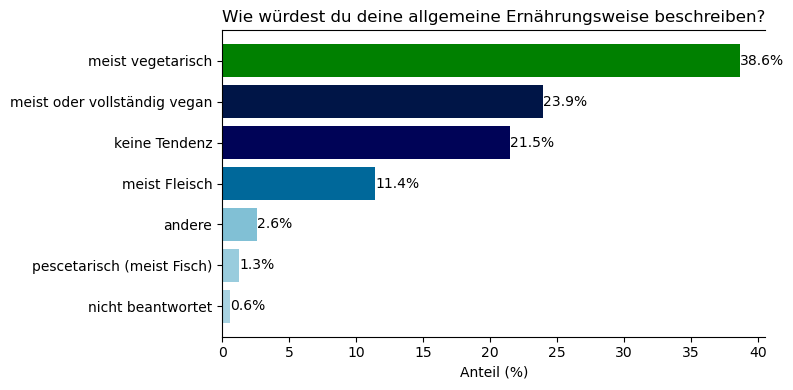

In [7]:
# "PR05";"Ernährungsform";"NOMINAL";"SELECTION";"Wie würdest du deine allgemeine Ernährungsweise beschreiben?"
myid = "PR05"
x = df[myid]
x = x.dropna()
z = values[values["VAR"]==myid][["RESPONSE","MEANING"]]
mapname = dict(z.values)

x[x<0]=0
mapname[0] = mapname[-9]

plt.figure(6, clear=True, figsize=(8,4))
y = np.bincount(x)
i = np.argsort(-y)

color=plt.cm.Blues( 0.35+y/y.max())
color=plt.cm.get_cmap('ocean_r')(0.1+y/y.max())
bars = plt.barh(np.arange(len(y)), y[i]/y.sum()*100, color=color[i,:])

plt.bar_label(bars, fmt='%.1f%%')
plt.xlabel('Anteil (%)')
labels = [mapname[j] for j in i]

for which in ["keine Tendenz", "andere"]:
    index = [idx for idx, s in enumerate(labels) if which in s][0]
    labels[index] = which
plt.yticks(np.arange(0,7), labels)
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.gca().invert_yaxis()
plt.title(q[myid]["QUESTION"] , loc='center', wrap=True)
plt.tight_layout();

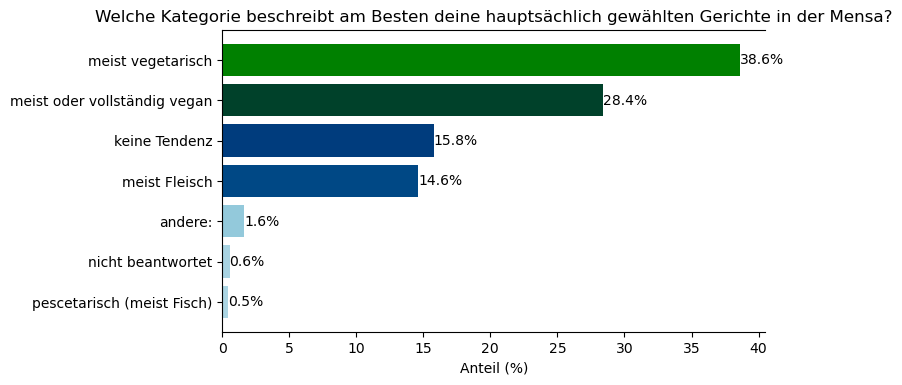

In [8]:
# "PR01";"Ernährungsform";"NOMINAL";"SELECTION";"Welche Kategorie beschreibt am Besten deine hauptsächlich gewählten Gerichte in der Mensa?"
myid = "PR01"
x = df[myid]

z = values[values["VAR"]==myid][["RESPONSE","MEANING"]]
mapname = dict(z.values)
mapname[5] = "keine Tendenz"

plt.figure(7, clear=True, figsize=(8,4))

res = x.value_counts()
y = res.values

color=plt.cm.get_cmap('ocean_r')(0.1+y/y.max())
bars = plt.barh(np.arange(len(y)), y/y.sum()*100, color=color)

plt.bar_label(bars, fmt='%.1f%%')
plt.xlabel('Anteil (%)')
labels = [mapname[i] for i in res.index]
plt.yticks(np.arange(len(labels)), labels=labels)

ax = plt.gca()
ax.spines['right'].set_visible(False)
plt.gca().invert_yaxis()

plt.title(q[myid]["QUESTION"] , loc='center', wrap=True)
plt.tight_layout()
plt.gcf().subplots_adjust(top=0.9);

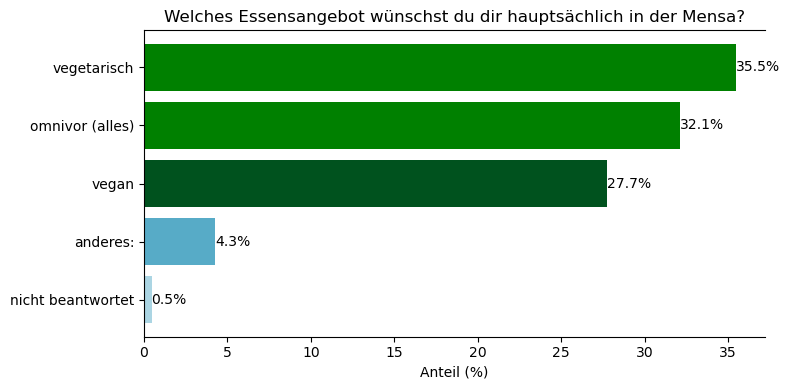

In [9]:
# "ME02";"Essensangebot";"NOMINAL";"SELECTION";"Welches Essensangebot wünschst du dir hauptsächlich in der Mensa?"
myid = "ME02"
x = df[myid]

z = values[values["VAR"]==myid][["RESPONSE","MEANING"]]
mapname = dict(z.values)
#mapname[5] = "keine Tendenz"

plt.figure(8, clear=True, figsize=(8,4))

res = x.value_counts()
y = res.values

color=plt.cm.get_cmap('ocean_r')(0.1+y/y.max())
bars = plt.barh(np.arange(len(y)), y/y.sum()*100, color=color)

plt.bar_label(bars, fmt='%.1f%%')
plt.xlabel('Anteil (%)')
labels = [mapname[i] for i in res.index]
plt.yticks(np.arange(len(labels)), labels=labels)

ax = plt.gca()
ax.spines['right'].set_visible(False)
plt.gca().invert_yaxis()

plt.title(q[myid]["QUESTION"] , loc='center', wrap=True)
plt.tight_layout();

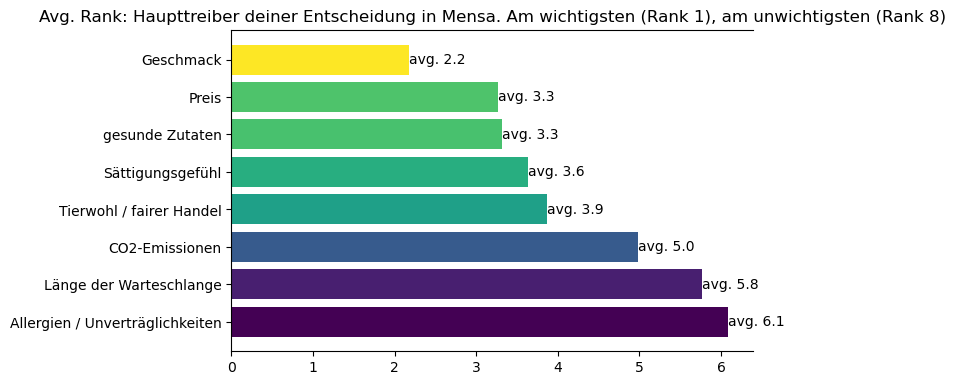

In [10]:
# "AK02_01";"Entscheidungskriterien: Preis";"ORDINAL";"RANKING";"Was sind die Haupttreiber deiner Entscheidung in der Mensa?"
myid = "AK02"
myids = [i for i in q.keys() if i.startswith(myid+'_')]

rankings = np.zeros((len(df), len(myids)), dtype=int) 
labels = []
for i, theid in enumerate(myids):
    rankings[:,i] = df[theid].values
    labels.append(q[theid]["LABEL"][len("Entscheidungskriterien: "):])
labels[2] = 'CO2-Emissionen'    
#%%
plt.figure(11, clear=True, figsize=(8,4))
y = rankings.mean(axis=0)
i = np.argsort(y)
color=plt.cm.get_cmap('viridis_r')((y[i]-y.min())/(y.max()-y.min()))
bars = plt.barh(np.arange(len(myids)), y[i], color=color)
plt.bar_label(bars, fmt="avg. %.1f")

sortedlabels = [labels[j] for j in i]
plt.yticks(np.arange(len(myids)), labels=sortedlabels)
plt.title(q[myids[0]]["QUESTION"] , loc='center', wrap=True)
plt.title('Avg. Rank: Haupttreiber deiner Entscheidung in Mensa. Am wichtigsten (Rank 1), am unwichtigsten (Rank 8)',loc='center', wrap=True)
plt.gca().invert_yaxis()
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.gcf().subplots_adjust(top=0.9);

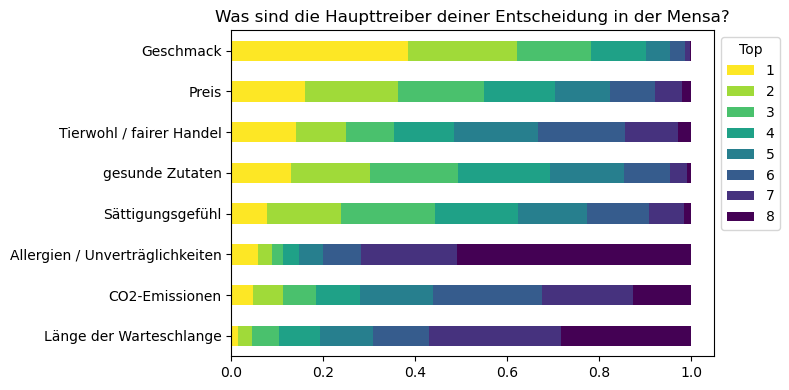

In [11]:
# Ranking data
plt.figure(9, clear=True, figsize=(8,4))
numUser, n = rankings.shape 
probs = np.zeros((n+1,n+1))

for i in range(n):
    tmp = rankings[:,i]
    tmp = tmp[tmp>0] 
    y= np.bincount(tmp, minlength=n+1)
    probs[i+1,:] = y/y.sum()


rankingDF = pd.DataFrame(probs[1:,1:], index=labels, columns=np.arange(1,n+1))
rankingDF.sort_values(by=1,ascending=False).plot(kind='barh', stacked=True, cmap='viridis_r', ax=plt.gca())
#plt.yticks(np.arange(1,n+1),labels=labels)
plt.legend(title='Top',loc='upper left', bbox_to_anchor=(1, 1))
plt.gca().invert_yaxis()
plt.title(q[myids[0]]["QUESTION"] , loc='center', wrap=True)
plt.tight_layout();

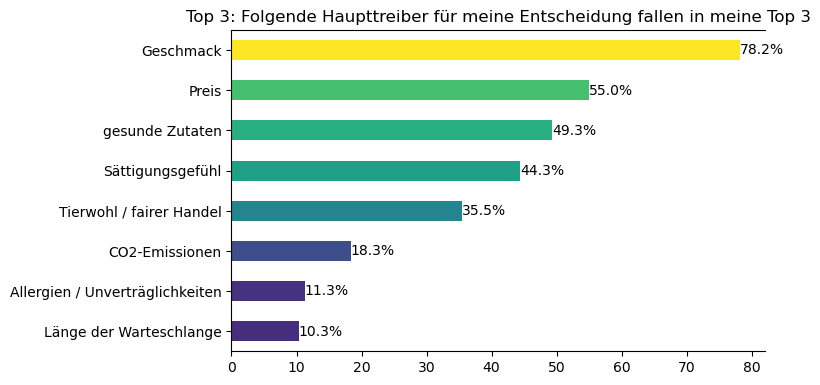

In [12]:
plt.figure(10, clear=True, figsize=(8,4)),
y = 100*(rankingDF[1]+rankingDF[2]+rankingDF[3])
color=plt.cm.get_cmap('viridis')(y.sort_values()/y.max())
y.sort_values().plot(kind='barh', color=color)
ax = plt.gca()
ax.bar_label(ax.containers[0], fmt='%.1f%%')
ax.spines['right'].set_visible(False)
#plt.title('Haupttreiber für Entscheidung fällt in meine Top 3: '+q[myids[0]]["QUESTION"] , loc='center', wrap=True)
#plt.title('Top 3: Folgende Haupttreiber für meine Entscheidung fallen in meine Top 3: '+q[myids[0]]["QUESTION"] , loc='center', wrap=True)
plt.title('Top 3: Folgende Haupttreiber für meine Entscheidung fallen in meine Top 3', loc='center', wrap=True)
plt.tight_layout()
plt.gcf().subplots_adjust(top=0.9)

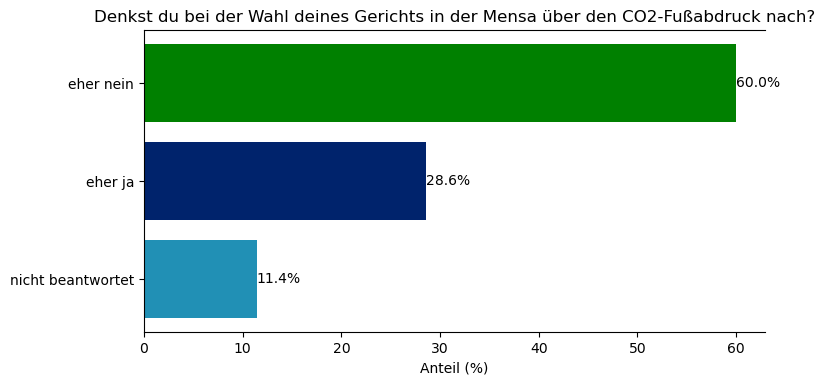

In [13]:
# "FA01";"Bedeutung des Fußabdrucks";"NOMINAL";"SELECTION";"Denkst du bei der Wahl deines Gerichts in der Mensa über den CO2-Fußabdruck nach?"
myid = "FA01"
x = df[myid]

z = values[values["VAR"]==myid][["RESPONSE","MEANING"]]
mapname = dict(z.values)

plt.figure(12, clear=True, figsize=(8,4))

res = x.value_counts()
y = res.values

color=plt.cm.get_cmap('ocean_r')(0.1+y/y.max())
bars = plt.barh(np.arange(len(y)), y/y.sum()*100, color=color)

plt.bar_label(bars, fmt='%.1f%%')
plt.xlabel('Anteil (%)')
labels = [mapname[i] for i in res.index]
plt.yticks(np.arange(len(labels)), labels=labels)

ax = plt.gca()
ax.spines['right'].set_visible(False)
plt.gca().invert_yaxis()

plt.title(q[myid]["QUESTION"] , loc='center', wrap=True)
plt.tight_layout()
plt.gcf().subplots_adjust(top=0.9)

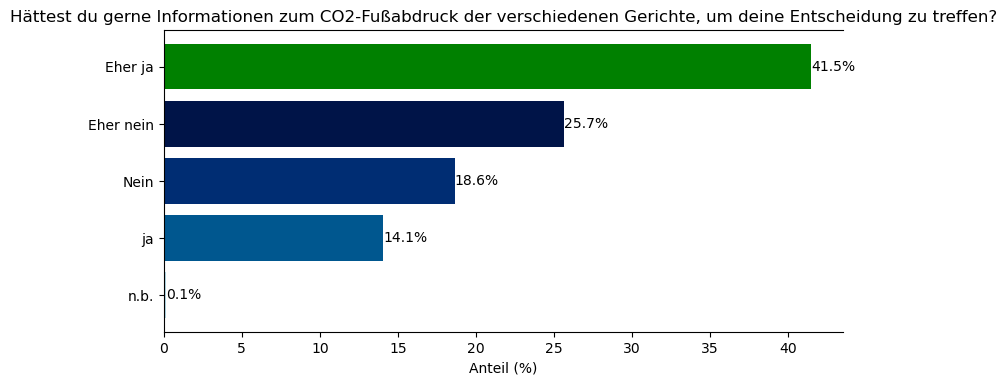

In [14]:
#"FA02";"Info-Wunsch";"NOMINAL";"SELECTION";"Hättest du gerne Informationen zum CO2-Fußabdruck der verschiedenen Gerichte, um deine Entscheidung zu treffen?"
myid = "FA02"
x = df[myid]

z = values[values["VAR"]==myid][["RESPONSE","MEANING"]]
mapname = dict(z.values)
shortmap = {1:'Nein', 2:'Eher nein', 3:'Eher ja', 4:'ja', -9:'n.b.'}

plt.figure(13, clear=True, figsize=(8,4))

res = x.value_counts()
y = res.values

color=plt.cm.get_cmap('ocean_r')(0.1+y/y.max())
bars = plt.barh(np.arange(len(y)), y/y.sum()*100, color=color)

plt.bar_label(bars, fmt='%.1f%%')
plt.xlabel('Anteil (%)')
labels = [shortmap[i] for i in res.index]
plt.yticks(np.arange(len(labels)), labels=labels)

ax = plt.gca()
ax.spines['right'].set_visible(False)
plt.gca().invert_yaxis()

plt.title(q[myid]["QUESTION"] , loc='center', wrap=True)
plt.tight_layout()
plt.gcf().subplots_adjust(top=0.9)

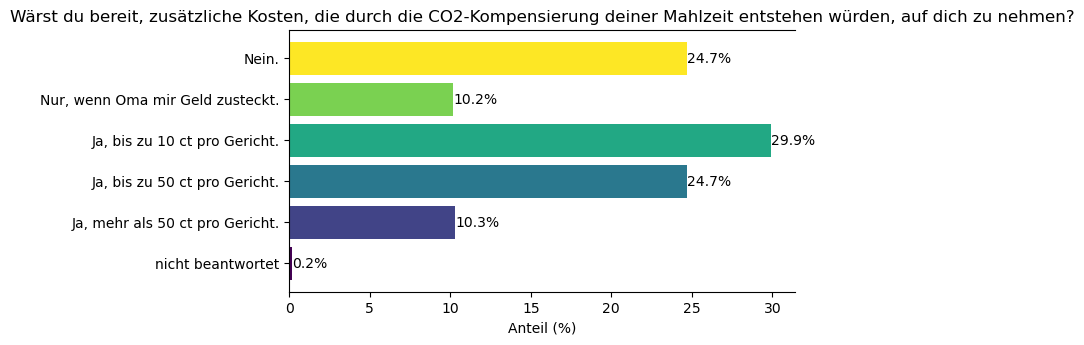

In [15]:
# "KO01";"Bereitschaft";"NOMINAL";"SELECTION";"Wärst du bereit, zusätzliche Kosten, die durch die CO2-Kompensierung deiner Mahlzeit entstehen würden, auf dich zu nehmen?"
myid = "KO01"
x = df[myid]

z = values[values["VAR"]==myid][["RESPONSE","MEANING"]]
mapname = dict(z.values)

shortmap = {1: 'Ja, mehr als 50 ct pro Gericht.',
 2: 'Ja, bis zu 50 ct pro Gericht.',
 3: 'Ja, bis zu 10 ct pro Gericht.',
 4: 'Nur, wenn Oma mir Geld zusteckt.',
 5: 'Nein.',
 -9: 'nicht beantwortet'}

plt.figure(14, clear=True, figsize=(8,4))

res = x.value_counts().sort_index()
y = res.values

color=plt.cm.get_cmap('ocean_r')(0.1+y/y.max())
color=plt.cm.get_cmap('viridis')(np.linspace(0,1,len(shortmap)))
bars = plt.barh(np.arange(len(y)), y/y.sum()*100, color=color)

plt.bar_label(bars, fmt='%.1f%%')
plt.xlabel('Anteil (%)')
labels = [shortmap[i] for i in res.index]
plt.yticks(np.arange(len(labels)), labels=labels)

ax = plt.gca()
ax.spines['right'].set_visible(False)
#plt.gca().invert_yaxis()

plt.title(q[myid]["QUESTION"] , loc='center',wrap=True)
plt.tight_layout()
plt.gcf().subplots_adjust(top=0.8)

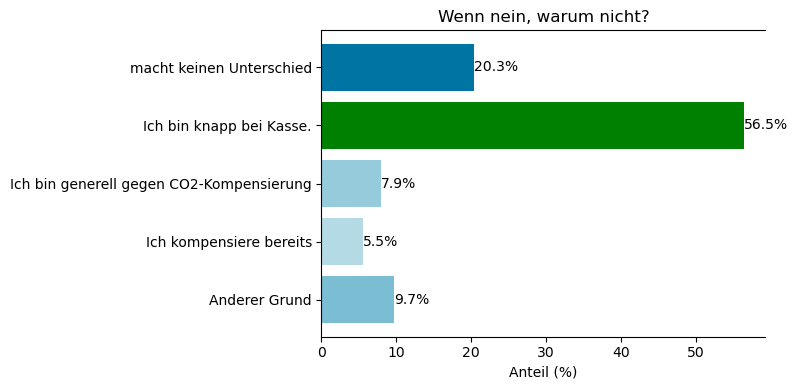

In [16]:
# "KO02";"Gründe gegen Kompensierung: Ausweichoption (negativ) oder Anzahl ausgewählter Optionen";"METRIC";"SYSTEM";"Wenn nein, warum nicht?"
myid = 'KO02'
myids = ["KO02_01","KO02_02","KO02_03","KO02_04","KO02_05"]

selected= np.zeros(len(myids))
reasons = []
for i, theid in enumerate(myids):    
    selected[i] = np.sum(df[theid]==2)
    reasons.append(q[theid]["LABEL"][len("Gründe gegen Kompensierung: "):])
    
short_reasons = ['macht keinen Unterschied',
 'Ich bin knapp bei Kasse.',
 'Ich bin generell gegen CO2-Kompensierung',
 'Ich kompensiere bereits',
 'Anderer Grund']    

plt.figure(15, clear=True, figsize=(8,4))    
ax = plt.gca()
ind = np.arange(len(reasons))

y = selected/selected.sum()*100
color=plt.cm.get_cmap('ocean_r')(y/y.max())
bars = ax.barh(ind, y, color=color)
ax.bar_label(bars, fmt='%.1f%%')
plt.yticks(ind, labels= short_reasons )
plt.gca().invert_yaxis()
plt.xlabel('Anteil (%)')
plt.title(q[myid]["QUESTION"], wrap=True)
ax.spines['right'].set_visible(False)
plt.tight_layout()

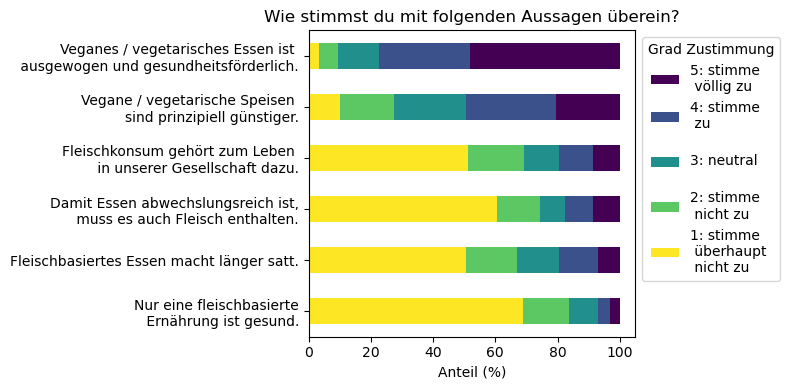

In [17]:
myid = "ET03"
myids = [i for i in q.keys() if i.startswith(myid+'_')]

rankings = np.zeros((len(df), len(myids)), dtype=int) 
labels = []
for i, theid in enumerate(myids):
    rankings[:,i] = df[theid].values
    labels.append(q[theid]["LABEL"][len("Einstellungen zur Ernährung: "):])

labelsshort=['Nur eine fleischbasierte\n Ernährung ist gesund.',
 'Damit Essen abwechslungsreich ist,\n muss es auch Fleisch enthalten.',
 'Veganes / vegetarisches Essen ist \n ausgewogen und gesundheitsförderlich.',
 'Fleischbasiertes Essen macht länger satt.',
 'Vegane / vegetarische Speisen \nsind prinzipiell günstiger.',
 'Fleischkonsum gehört zum Leben \n in unserer Gesellschaft dazu.']

plt.figure(16, clear=True, figsize=(8,4))   
numUser, n = rankings.shape 
probs = np.zeros((n,6))

for i in range(n):
    tmp = rankings[:,i]
    tmp = tmp[tmp>0] 
    y= np.bincount(tmp, minlength=5)
    probs[i,:] = y/y.sum()


rankingDF = pd.DataFrame(probs[:,1:]*100, index=labelsshort, columns=np.arange(1,6))
rankingDF.sort_values(by=5,ascending=False).plot(kind='barh', stacked=True, cmap='viridis_r', ax=plt.gca())
#plt.yticks(np.arange(1,n+1),labels=labels)
#plt.legend(['1: stimme\n überhaupt \n nicht zu','2: stimme\n nicht zu','3: neutral','4: stimme zu','5: stimme\n völlig zu'],
#           title='Grad Zustimmung',loc='upper left', bbox_to_anchor=(1, 1))
thelabels = ['1: stimme\n überhaupt \n nicht zu','2: stimme\n nicht zu','\n3: neutral\n','4: stimme\n zu','5: stimme\n völlig zu']
ax = plt.gca()
handles, tmp = ax.get_legend_handles_labels()
ax.legend(handles[::-1], thelabels[::-1], title='Grad Zustimmung',loc='upper left', bbox_to_anchor=(1, 1))

plt.gca().invert_yaxis()
plt.title(q[myids[0]]["QUESTION"] , loc='center', wrap=True)
plt.xlabel('Anteil (%)')
plt.tight_layout();

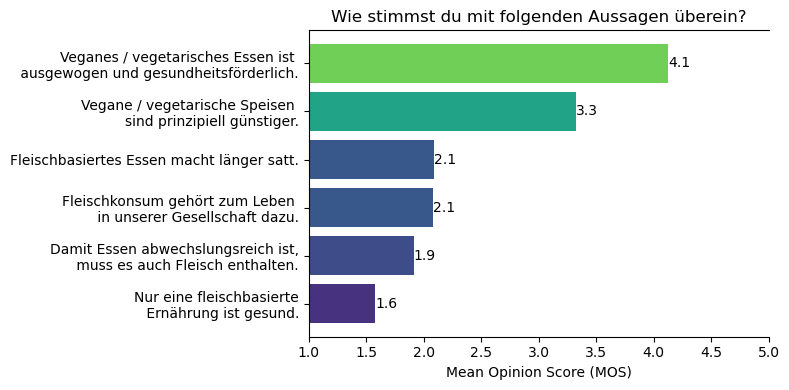

In [18]:
plt.figure(17, clear=True, figsize=(8,4))   

p = rankingDF.values/100
topic = rankingDF.index
MOS = p@np.arange(1,6)
i = np.argsort(MOS)

color=plt.cm.get_cmap('viridis')((MOS[i]-1)/4)
bars = plt.barh(np.arange(len(topic)), MOS[i], color=color)
ax = plt.gca()
ax.bar_label(bars, fmt='%.1f')
plt.xlabel('Mean Opinion Score (MOS)')
plt.title(q[myids[0]]["QUESTION"], wrap=True)
ax.spines['right'].set_visible(False)
plt.yticks(np.arange(len(topic)), labels= [labelsshort[j] for j in i] )
plt.xlim([1,5])
plt.tight_layout()